In [1]:
# nEXO exp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import histlite
from tqdm.notebook import tqdm
import seaborn as sns
from tqdm import tqdm

import sys
sys.path.append('/p/lustre1/yu47/Sterile_Neutrino/sensitivity/')

from neutrino_source import neutrino_source
from detector import detector
from MC_generator import gen_LZ
from MC_generator import MC_generator
#from fitter import fitter
source_nEXO = neutrino_source('Cr51', 1e5, [0.75], [1.0])
source_nEXO.height = 0.05
source_nEXO.diameter = 0.05
det_nEXO = detector('nEXO')
det_nEXO.update_geometry(1.183, 1.133)
det_nEXO.position = (0, 0, 0)
dist = 0.1
source_nEXO.position = (0, 0, -det_nEXO.height/2-dist)

det_nEXO.run_time = 100 # days

dm2, sin2theta_square = 0.0, 0.0
gen1 = MC_generator(source_nEXO, det_nEXO, dm2=dm2, sin2theta_square=sin2theta_square, int_type='CC'); 


A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [1.0] is created.
A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [1.0] is created.


In [2]:
def parse_parameters(dm2, sin2):
    label = r'$\Delta m^2=$' + f'{dm2:.1f}' + r' eV$^2, \sin^2(2\theta) = $' + f'{sin2:.2f}'
    return label

## Test different oscillation parameters

In [86]:
gen1.source.height = 0.14
gen1.source.diameter = 0.14

gen1._set_dm2(0.0)
gen1._set_sin2theta_square(0.0)
pair0, x_src0, y_src0, z_src0, x_det0, y_det0, z_det0 = gen1.monte_carlo_sampling(n_event=1000000, return_pos=True)
gen1._set_dm2(5.0)
gen1._set_sin2theta_square(0.5)
pair1, x_src1, y_src1, z_src1, x_det1, y_det1, z_det1 = gen1.monte_carlo_sampling(n_event=1000000, return_pos=True)
gen1._set_dm2(31.0)
gen1._set_sin2theta_square(0.8)
pair2, x_src2, y_src2, z_src2, x_det2, y_det2, z_det2 = gen1.monte_carlo_sampling(n_event=1000000, return_pos=True)


0.029999999999999916 1.4952395293062581 49


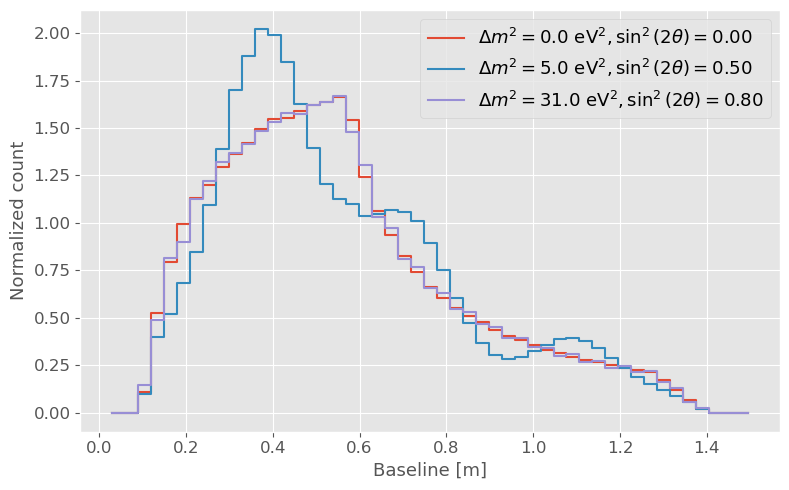

In [94]:

gen1.source.height = 0.14
gen1.source.diameter = 0.14
bin1 = abs(gen1.det.position[2] - gen1.source.position[2]) - gen1.source.height/2. - gen1.det.height/2.
bin2 = np.sqrt((gen1.det.radius+gen1.source.diameter/2.)**2 + (abs(gen1.det.position[2] - gen1.source.position[2]) + gen1.source.height/2. + gen1.det.height/2.)**2 )
binwidth = 0.03
nbin = int((bin2 - bin1) / binwidth) + 1
print(bin1, bin2, nbin)

fig, ax = plt.subplots(figsize=(8, 5))
h0 = histlite.hist(data=pair0[:,1], weights=pair0[:,2], bins=nbin, range=(bin1,bin2)); h0 = h0.normalize()
h1 = histlite.hist(data=pair1[:,1], weights=pair1[:,2], bins=nbin, range=(bin1,bin2)); h1 = h1.normalize()
h2 = histlite.hist(data=pair2[:,1], weights=pair2[:,2], bins=nbin, range=(bin1,bin2)); h2 = h2.normalize()
histlite.plot1d(ax, h0, label=parse_parameters(0.0, 0.0))
histlite.plot1d(ax, h1, label=parse_parameters(5.0, 0.5))
histlite.plot1d(ax, h2, label=parse_parameters(31.0, 0.8))
ax.set_xlabel('Baseline [m]', fontsize=13)
ax.set_ylabel('Normalized count', fontsize=13)
ax.tick_params(labelsize=12)
ax.legend(fontsize=13)
plt.tight_layout()

## Test different source geometry configurations

In [66]:
# Set oscillation parameters:
gen1._set_dm2(0.0)
gen1._set_sin2theta_square(0.0)


gen1.source.height = 0.01
gen1.source.diameter = 0.01
pair0 = gen1.monte_carlo_sampling(n_event=1000000, return_pos=False)
gen1.source.height = 0.05
gen1.source.diameter = 0.05
pair1= gen1.monte_carlo_sampling(n_event=1000000, return_pos=False)
gen1.source.height = 0.14
gen1.source.diameter = 0.14
pair2 = gen1.monte_carlo_sampling(n_event=1000000, return_pos=False)

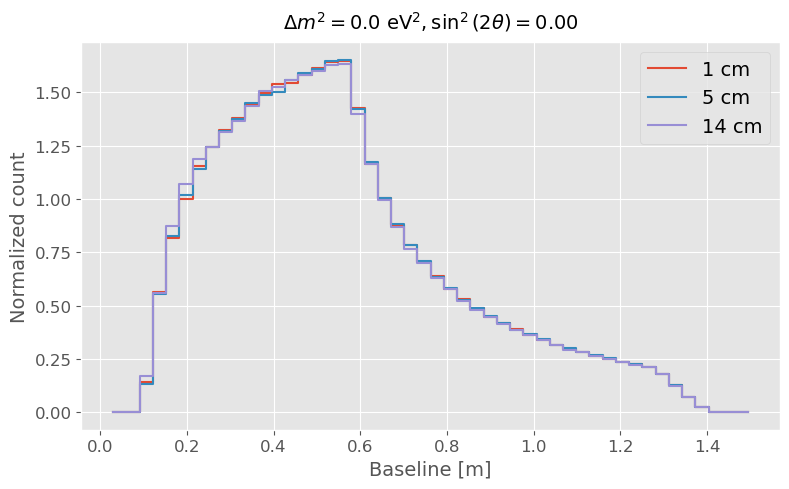

In [67]:
bin1 = abs(gen1.det.position[2] - gen1.source.position[2]) - gen1.source.height/2. - gen1.det.height/2.
bin2 = np.sqrt((gen1.det.radius+gen1.source.diameter/2.)**2 + (abs(gen1.det.position[2] - gen1.source.position[2]) + gen1.source.height/2. + gen1.det.height/2.)**2 )
binwidth = 0.03
nbin = int((bin2 - bin1) / binwidth)

fig, ax1 = plt.subplots(figsize=(8, 5))
h0 = histlite.hist(pair0[:,1], weights=pair0[:,2], range=(bin1, bin2), bins=nbin); h0 = h0.normalize()
h1 = histlite.hist(pair1[:,1], weights=pair1[:,2], range=(bin1, bin2), bins=nbin); h1 = h1.normalize()
h2 = histlite.hist(pair2[:,1], weights=pair2[:,2], range=(bin1, bin2), bins=nbin); h2 = h2.normalize()
histlite.plot1d(ax1, h0, label='1 cm')
histlite.plot1d(ax1, h1, label='5 cm')
histlite.plot1d(ax1, h2, label='14 cm')
ax1.legend(fontsize=14)
ax1.set_xlabel('Baseline [m]', fontsize=14)
ax1.set_ylabel('Normalized count', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.set_title(parse_parameters(gen1.dm2, gen1.sin2theta_square), fontsize=14, pad=10)
plt.tight_layout()
plt.savefig('../plots/MCalg_dm2_0eV_sin2_0.0_3cmbin_diffSourceGeom.png')

## Compare with numerical calculation

In [2]:
import pickle


#num_datafile = "/p/lustre1/yu47/Sterile_Neutrino/jobs/PDFs/source_smear/Ev750_dist10cm_3cmbin/dm25.2140eV2_sin20.5214_Ev750keV_dist10cm_3.0cmbin_nosmear_sourceH14cmD14cm.p"
#num_datafile = "/p/lustre1/yu47/Sterile_Neutrino/jobs/PDFs/source_smear/Ev750_dist10cm_3cmbin/dm210.0000eV2_sin20.5462_Ev750keV_dist10cm_3.0cmbin_nosmear_sourceH14cmD14cm.p"
num_datafile = "/p/lustre1/yu47/Sterile_Neutrino/jobs/PDFs/source_smear/Ev750_dist10cm_3cmbin/dm20.0000eV2_sin20.0000_Ev750keV_dist10cm_3.0cmbin_nosmear_sourceH14cmD14cm.p"
with open(num_datafile, 'rb') as f:
    dat = pickle.load(f)
for _, v in dat.items():
    h_num = v
h_num = h_num.normalize()
binlow = h_num.bins[0][0]
binhig = h_num.bins[0][-1]
binnum = h_num.n_bins[0]

### direct generated from codes
#gen1._set_dm2(0.0)
#gen1._set_sin2theta_square(0.)
#gen1.source.height = 0.14
#gen1.source.diameter = 0.14
#pairs = gen1.monte_carlo_sampling(n_event=10000000, return_pos=False)
#h_mc = histlite.hist(pairs[:,1], weights=pairs[:,2], bins=binnum, range=(binlow, binhig))
#h_mc = h_mc.normalize()


## Load from pre-generated arrays for larger stats
arr = None
path = '/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/'
for i in range(100):
    filename = path + f"MC_dmsquare0.0sinsquare0.0_source14cm_seed{i}.txt"
    if i == 0:
        arr = np.loadtxt(filename)
    else:
        arr = np.hstack((arr, np.loadtxt(filename)))
        
h_mc = histlite.hist(arr[:,1], weights=arr[:,2], bins=binnum, range=(binlow, binhig))
h_mc = h_mc.normalize()


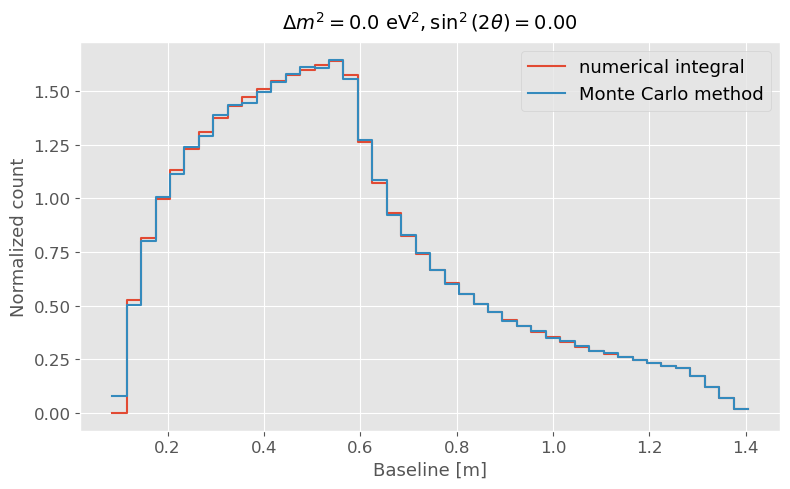

In [5]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,5))
histlite.plot1d(ax, h_num, label='numerical integral')
histlite.plot1d(ax, h_mc,  label='Monte Carlo method')
ax.set_xlabel('Baseline [m]', fontsize=13)
ax.set_ylabel('Normalized count', fontsize=13)
ax.tick_params(labelsize=12)
ax.legend(fontsize=13)
ax.set_title(parse_parameters(gen1.dm2, gen1.sin2theta_square), fontsize=14, pad=10)
plt.tight_layout()
#plt.savefig('../plots/compare_MCalg_numInt_test0_source14cm.png')

## Spatial smearing with resolution

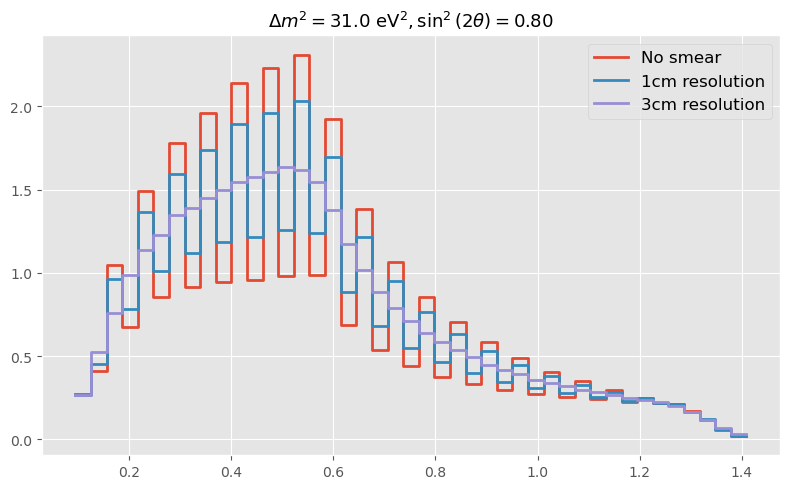

In [89]:
bl_smear0_1cm = np.random.normal(loc=pair0[:, 1], scale=0.01,)
bl_smear0_3cm = np.random.normal(loc=pair0[:, 1], scale=0.03,)
h0_smear_1cm = histlite.hist(bl_smear0_1cm, weights=pair0[:,2], range=(bin1, bin2), bins=nbin); h0_smear_1cm = h0_smear_1cm.normalize()
h0_smear_3cm = histlite.hist(bl_smear0_3cm, weights=pair0[:,2], range=(bin1, bin2), bins=nbin); h0_smear_3cm = h0_smear_3cm.normalize()
bl_smear1_1cm = np.random.normal(loc=pair1[:, 1], scale=0.01,)
bl_smear1_3cm = np.random.normal(loc=pair1[:, 1], scale=0.03,)
h1_smear_1cm = histlite.hist(bl_smear1_1cm, weights=pair1[:,2], range=(bin1, bin2), bins=nbin); h1_smear_1cm = h1_smear_1cm.normalize()
h1_smear_3cm = histlite.hist(bl_smear1_3cm, weights=pair1[:,2], range=(bin1, bin2), bins=nbin); h1_smear_3cm = h1_smear_3cm.normalize()
bl_smear2_1cm = np.random.normal(loc=pair2[:, 1], scale=0.01,)
bl_smear2_3cm = np.random.normal(loc=pair2[:, 1], scale=0.03,)
h2_smear_1cm = histlite.hist(bl_smear2_1cm, weights=pair2[:,2], range=(bin1, bin2), bins=nbin); h2_smear_1cm = h2_smear_1cm.normalize()
h2_smear_3cm = histlite.hist(bl_smear2_3cm, weights=pair2[:,2], range=(bin1, bin2), bins=nbin); h2_smear_3cm = h2_smear_3cm.normalize()

#fig, ax = plt.subplots(1, 3, figsize=(16, 4))
#histlite.plot1d(ax[0], h0, lw=2, label='No smear')
#histlite.plot1d(ax[0], h0_smear_1cm, lw=2, label='1cm resolution')
#histlite.plot1d(ax[0], h0_smear_3cm, lw=2, label='3cm resolution')
#ax[0].set_title(parse_parameters(0.0, 0.0), fontsize=13)
#histlite.plot1d(ax[1], h1, lw=2, label='No smear')
#histlite.plot1d(ax[1], h1_smear_1cm, lw=2, label='1cm resolution')
#histlite.plot1d(ax[1], h1_smear_3cm, lw=2, label='3cm resolution')
#ax[1].set_title(parse_parameters(5.0, 0.5), fontsize=13)
#histlite.plot1d(ax[2], h2, lw=2, label='No smear')
#histlite.plot1d(ax[2], h2_smear_1cm, lw=2, label='1cm resolution')
#histlite.plot1d(ax[2], h2_smear_3cm, lw=2, label='3cm resolution')
#ax[2].set_title(parse_parameters(31.0, 0.8), fontsize=13)
#
#ax[2].legend(fontsize=12)

fig, ax = plt.subplots(figsize=(8, 5))
histlite.plot1d(ax, h2, lw=2, label='No smear')
histlite.plot1d(ax, h2_smear_1cm, lw=2, label='1cm resolution')
histlite.plot1d(ax, h2_smear_3cm, lw=2, label='3cm resolution')
ax.set_title(parse_parameters(31.0, 0.8), fontsize=13)

ax.legend(fontsize=12)


plt.tight_layout()
plt.savefig('../plots/SpatialSmearing_3cmbin_diffOscParams_0.01cmSource.png')

## Batch data generatrion (dm2=sin2=0)

In [91]:
for i in tqdm(range(100, 110)):
    pairs  = gen1.monte_carlo_sampling(n_event=1000000)
    np.savetxt(f'/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/MC_14cmSource_{i}.txt', pairs)

100%|██████████| 10/10 [02:48<00:00, 16.80s/it]


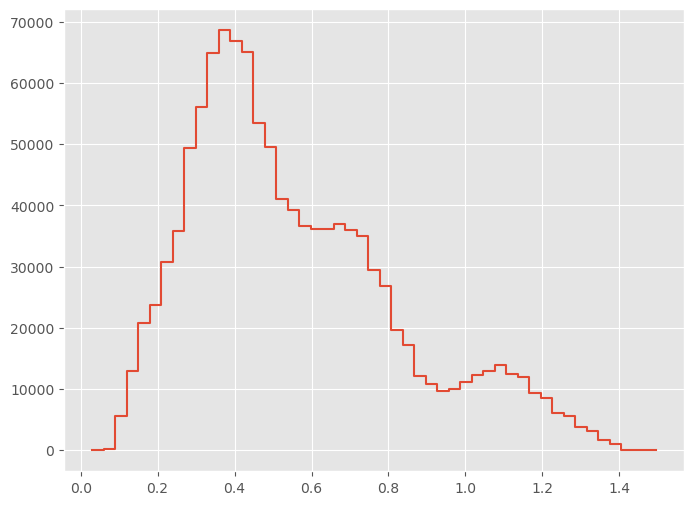

In [96]:
with open("/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/MC_dmsquare5.00000sinsquare0.50000_source14cm_smear0.01m.p", 'rb') as f:
    h = pickle.load(f)
fig, ax = plt.subplots(figsize=(8,6))
histlite.plot1d(ax, h)

## Study statistics
Here I suppose the predicted stat. of LZ is under the assumption without oscillation.

In [104]:

print(gen_LZ.source.height , gen_LZ.source.diameter, gen_LZ.source.position)
print(gen_LZ.det.height, gen_LZ.det.radius, gen_LZ.det.position)
gen_LZ._set_dm2(0.0)
gen_LZ._set_sin2theta_square(0.0)

for i in tqdm(range(100, 110)):
    arr  = gen_LZ.monte_carlo_sampling(n_event=1000000)
    np.savetxt(f'/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/MC_14cmSource_LZdet_{i}.txt', arr)

0.14 0.14 (0, 0, -1.69)
1.38 0.69 (0, 0, 0)


100%|██████████| 10/10 [02:42<00:00, 16.21s/it]


In [125]:
path = "/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/"
from oscillation import electron_neutrino_survival_probability

nfile = 0
baseline_LZ, weight_LZ = None, None
for seed in range(100, 110):
    #datafile = f"MC_dmsquare0.0sinsquare0.0_source14cm_seed{seed}.txt"
    datafile = f'MC_14cmSource_LZdet_{seed}.txt'
    print(datafile)

    arr = np.loadtxt(path+datafile)
    #smear_bl = np.random.normal(loc=arr[:, 1], scale=)
    smear_bl = arr[:, 1]

    bl0 = arr[:, 0]
    survival_prob0 = electron_neutrino_survival_probability(0.0, 0.0, 0.75, bl0)
    survival_prob  = electron_neutrino_survival_probability(0.0, 0.0, 0.75, bl0)

    factor = arr[:, 2] / survival_prob0 * survival_prob

    if nfile == 0:
        baseline_LZ = smear_bl
        weight_LZ = factor

    else:
        baseline_LZ = np.hstack((baseline_LZ, smear_bl))
        weight_LZ = np.hstack((weight_LZ, factor))
    nfile += 1


MC_14cmSource_LZdet_100.txt
MC_14cmSource_LZdet_101.txt
MC_14cmSource_LZdet_102.txt
MC_14cmSource_LZdet_103.txt
MC_14cmSource_LZdet_104.txt
MC_14cmSource_LZdet_105.txt
MC_14cmSource_LZdet_106.txt
MC_14cmSource_LZdet_107.txt
MC_14cmSource_LZdet_108.txt
MC_14cmSource_LZdet_109.txt


In [130]:
bin1_LZ = abs(gen_LZ.det.position[2] - gen_LZ.source.position[2]) - gen_LZ.source.height/2. - gen_LZ.det.height/2.
bin2_LZ = np.sqrt((gen_LZ.det.radius+gen_LZ.source.diameter/2.)**2 + (abs(gen_LZ.det.position[2] - gen_LZ.source.position[2]) + gen_LZ.source.height/2. + gen_LZ.det.height/2.)**2 )
binwidth = 0.03
nbin_LZ = int((bin2_LZ - bin1_LZ) / binwidth) + 1
print(bin1_LZ, bin2_LZ, nbin_LZ)

h_LZ = histlite.hist(baseline_LZ, weights=weight_LZ, bins=nbin_LZ, range=(bin1_LZ, bin2_LZ))
print(len(baseline_LZ), np.sum(weight_LZ), np.sum(h_LZ.values))

0.9299999999999999 2.5651705596314645 55
10000000 3759481.034124471 3759481.034124488


In [127]:
nfile = 0
baseline_nEXO, weight_nEXO = None, None
for seed in range(100, 110):
    #datafile = f"MC_dmsquare0.0sinsquare0.0_source14cm_seed{seed}.txt"
    datafile = f'MC_14cmSource_{seed}.txt'
    print(datafile)

    arr = np.loadtxt(path+datafile)
    #smear_bl = np.random.normal(loc=arr[:, 1], scale=)
    smear_bl = arr[:, 1]

    bl0 = arr[:, 0]
    survival_prob0 = electron_neutrino_survival_probability(0.0, 0.0, 0.75, bl0)
    survival_prob  = electron_neutrino_survival_probability(0.0, 0.0, 0.75, bl0)

    factor = arr[:, 2] / survival_prob0 * survival_prob

    if nfile == 0:
        baseline_nEXO = smear_bl
        weight_nEXO = factor

    else:
        baseline_nEXO = np.hstack((baseline_nEXO, smear_bl))
        weight_nEXO = np.hstack((weight_nEXO, factor))
    nfile += 1


MC_14cmSource_100.txt
MC_14cmSource_101.txt
MC_14cmSource_102.txt
MC_14cmSource_103.txt
MC_14cmSource_104.txt
MC_14cmSource_105.txt
MC_14cmSource_106.txt
MC_14cmSource_107.txt
MC_14cmSource_108.txt
MC_14cmSource_109.txt


In [131]:
bin1_nEXO = abs(gen1.det.position[2] - gen1.source.position[2]) - gen1.source.height/2. - gen1.det.height/2.
bin2_nEXO = np.sqrt((gen1.det.radius+gen1.source.diameter/2.)**2 + (abs(gen1.det.position[2] - gen1.source.position[2]) + gen1.source.height/2. + gen1.det.height/2.)**2 )
binwidth = 0.03
nbin_nEXO = int((bin2_nEXO - bin1_nEXO) / binwidth)
h_nEXO = histlite.hist(baseline_nEXO, weights=weight_nEXO, bins=nbin_nEXO, range=(bin1_nEXO, bin2_nEXO))
print(bin1_nEXO, bin2_nEXO, nbin_nEXO)
print(len(baseline_nEXO), np.sum(weight_nEXO), np.sum(h_nEXO.values))


print('\n')
ratio = np.sum(h_nEXO.values) / np.sum(h_LZ.values)
print(f'Statistics ratio is: {ratio:.4f}')

0.029999999999999916 1.4952395293062581 48
10000000 15639801.637552664 15639801.637552623


Statistics ratio is: 4.1601


In [7]:
_, x_src_LZ, y_src_LZ, z_src_LZ, x_det_LZ, y_det_LZ, z_det_LZ = gen_LZ.monte_carlo_sampling(n_event=10, return_pos=True)
_, x_src_nEXO, y_src_nEXO, z_src_nEXO, x_det_nEXO, y_det_nEXO, z_det_nEXO = gen1.monte_carlo_sampling(n_event=10, return_pos=True)
evts_nEXO, evts_LZ = [], []
for i in range(10):
    tmp_evts_LZ = []
    tmp_evts_LZ.append(x_src_LZ[i])
    tmp_evts_LZ.append(y_src_LZ[i])
    tmp_evts_LZ.append(z_src_LZ[i])
    tmp_evts_LZ.append(x_det_LZ[i])
    tmp_evts_LZ.append(y_det_LZ[i])
    tmp_evts_LZ.append(z_det_LZ[i])
    evts_LZ.append( tmp_evts_LZ )
    tmp_evts_nEXO = []
    tmp_evts_nEXO.append(x_src_nEXO[i])
    tmp_evts_nEXO.append(y_src_nEXO[i])
    tmp_evts_nEXO.append(z_src_nEXO[i])
    tmp_evts_nEXO.append(x_det_nEXO[i])
    tmp_evts_nEXO.append(y_det_nEXO[i])
    tmp_evts_nEXO.append(z_det_nEXO[i])
    evts_nEXO.append( tmp_evts_nEXO )

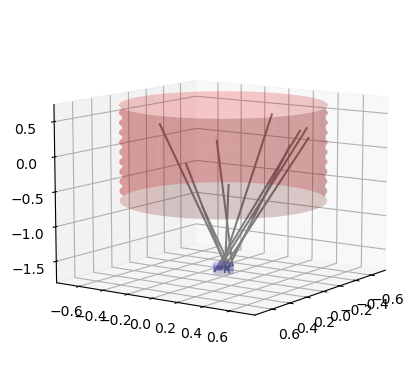

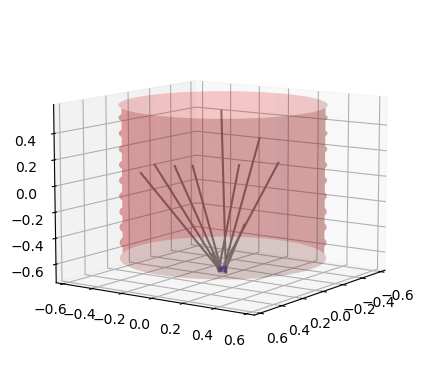

In [8]:
gen_LZ.draw_experiment_layout(elev=10, azim=35 , events=evts_LZ);
gen1.draw_experiment_layout(elev=10, azim=35 , events=evts_nEXO);

In [5]:
n_events = gen1.scale_counts()
print(n_events, gen1.n_events_noosc)

6147.992419985904 6147.992419985904


## Histograms with true statistics

In [26]:
import pickle
path = '/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/'
file0 = path + 'MC_dmsquare0.00000sinsquare0.00000_source14cm_smear0.01m.p'
file1 = path + 'MC_dmsquare5.00000sinsquare0.50000_source14cm_smear0.01m.p'
file2 = path + 'MC_dmsquare31.00000sinsquare0.50000_source14cm_smear0.01m.p'

with open(file0, 'rb') as f:
    h0 = pickle.load(f)
with open(file1, 'rb') as f:
    h1 = pickle.load(f)
with open(file2, 'rb') as f:
    h2 = pickle.load(f)
    

6147.99 4511.03130075072 5124.719693515383


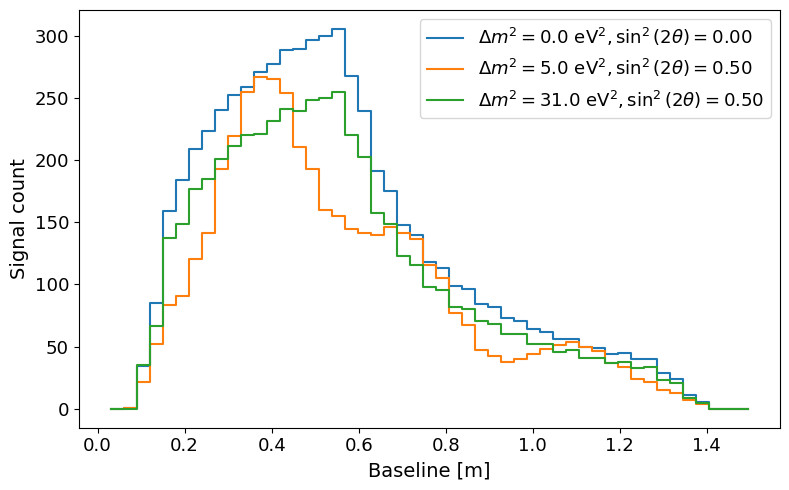

In [31]:
fig, ax = plt.subplots(figsize=(8,5))
histlite.plot1d(ax, h0, label=parse_parameters(0.0, 0.0))
histlite.plot1d(ax, h1, label=parse_parameters(5.0, 0.5))
histlite.plot1d(ax, h2, label=parse_parameters(31.0, 0.5))
print(np.sum(h0.values), np.sum(h1.values), np.sum(h2.values))
ax.set_xlabel('Baseline [m]', fontsize=14)
ax.set_ylabel('Signal count', fontsize=14)
ax.tick_params(labelsize=13)
ax.legend(fontsize=13)
plt.tight_layout()

## Test batch dataset

6147.99
6147.969620040863
6147.90772575325


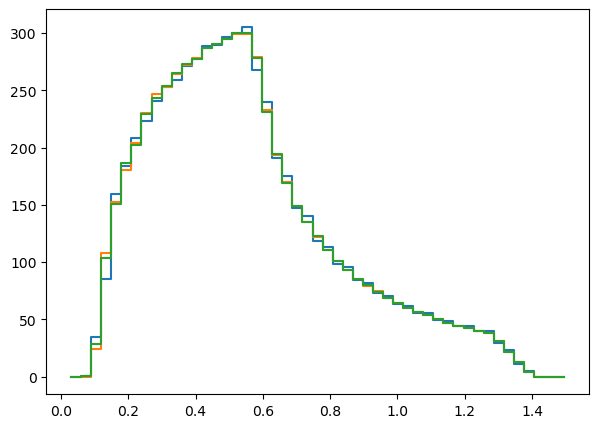

In [5]:
import pickle
path = '/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/'
file0 = path + 'MC_dmsquare0.00000sinsquare0.00000_source14cm_smear0.01m.p'
file1 = path + 'MC_dmsquare0.01000sinsquare0.03054_source14cm_smear0.01m.p'
file2 = path + 'MC_dmsquare0.01000sinsquare0.12328_source14cm_smear0.01m.p'
hists = []
files = [file0, file1, file2]
for fn in files:
    with open(fn, 'rb') as f:
        h = pickle.load(f)
        hists.append(h)
        print(np.sum(h.values))
fig, ax = plt.subplots(figsize=(7, 5))
for h in hists:
    histlite.plot1d(ax, h,)